In [2]:
# Practical 2: Bias-Variance Tradeoff using Polynomial Regression

import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

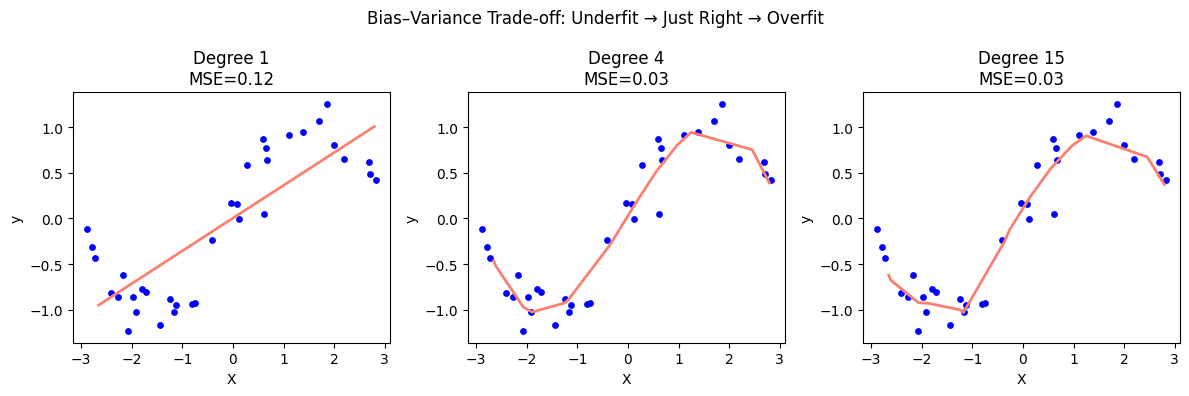

In [3]:
# Generating synthetic data with noise
np.random.seed(42)
X = np.sort(np.random.rand(50, 1) * 6 - 3, axis=0)  # X in [-3, 3]
y = np.sin(X) + np.random.randn(50, 1) * 0.2        # noisy sine wave
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Visualization of the synthetic data with variate degrees of polynomial regression
degrees = [1, 4, 15]
plt.figure(figsize=(12, 4))
for i, deg in enumerate(degrees, 1):
    poly = PolynomialFeatures(degree=deg)
    X_poly = poly.fit_transform(X_train)
    model = LinearRegression().fit(X_poly, y_train)

    X_test_poly = poly.transform(X_test)
    y_pred = model.predict(X_test_poly)

    plt.subplot(1, 3, i)
    plt.scatter(X_train, y_train, color='blue', s=15)
    plt.plot(np.sort(X_test, axis=0), 
             model.predict(poly.transform(np.sort(X_test, axis=0))),
             color='salmon', lw=2)
    plt.title(f"Degree {deg}\nMSE={mean_squared_error(y_test, y_pred):.2f}")
    plt.xlabel("X")
    plt.ylabel("y")

plt.suptitle("Bias–Variance Trade-off: Underfit → Just Right → Overfit")
plt.tight_layout()
plt.show()


Original shape: (200, 10)
After PCA: (200, 5)


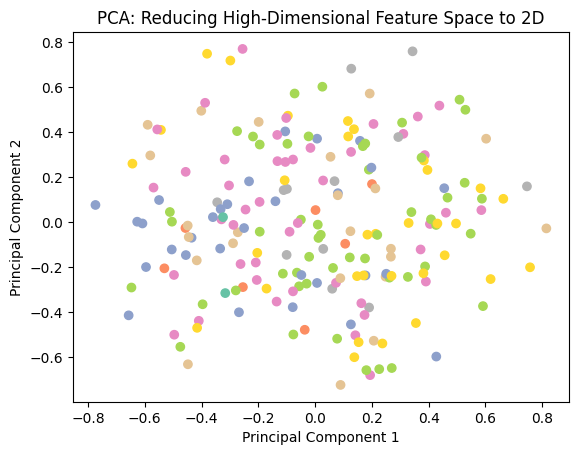

Performance with 10 features: 0.886
Performance after PCA : 0.104


In [4]:
X_hd = np.random.rand(200, 10)
y_hd = X_hd @ np.arange(1, 11) + np.random.randn(200) * 2  # linear relation with noise

# Reduce dimensions with PCA
pca = PCA(n_components=5)
X_pca = pca.fit_transform(X_hd)

print(f"Original shape: {X_hd.shape}")
print(f"After PCA: {X_pca.shape}")

# Visualize reduced data
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_hd, cmap='Set2')
plt.title("PCA: Reducing High-Dimensional Feature Space to 2D")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

model = LinearRegression()

# Cross-validation on original 10D data
score_full = cross_val_score(model, X_hd, y_hd, cv=5, scoring='r2').mean()

# Cross-validation on reduced 2D data
score_pca = cross_val_score(model, X_pca, y_hd, cv=5, scoring='r2').mean()

print(f"Performance with 10 features: {score_full:.3f}")
print(f"Performance after PCA : {score_pca:.3f}")

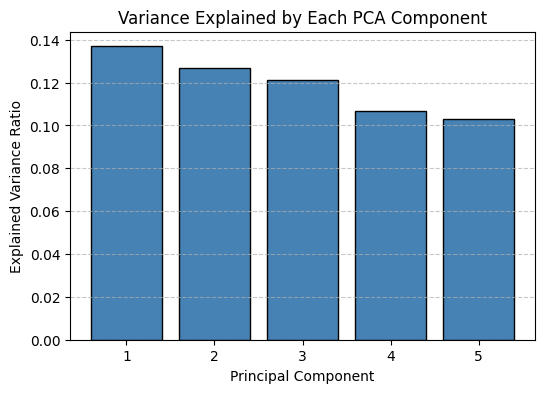

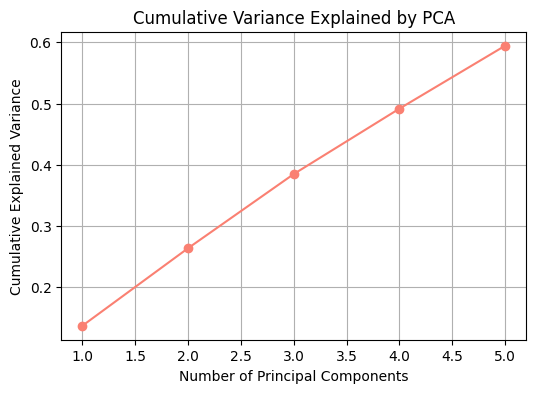

In [7]:
# Visualize explained variance by each principal component
plt.figure(figsize=(6,4))
components = np.arange(1, len(pca.explained_variance_ratio_) + 1)

plt.bar(components, pca.explained_variance_ratio_, color='steelblue', edgecolor='black')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Variance Explained by Each PCA Component')
plt.xticks(components)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# --- Optional cumulative variance line plot ---
plt.figure(figsize=(6,4))
plt.plot(components, np.cumsum(pca.explained_variance_ratio_), marker='o', color='salmon')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Variance Explained by PCA')
plt.grid(True)
plt.show()


Performance decreased as full variance wasn't captured in the reduced principal components.